#  Сборный проект 1

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
 - «EC» («Early childhood») — «Для детей младшего возраста»
 - «E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults")
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам»
 - «M» («Mature») — «Для взрослых»
 - «AO» («Adults Only 18+») — «Только для взрослых»
 - «RP» («Rating Pending») — «Рейтинг ожидается»


Данные за 2016 год могут быть неполными.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Хорошо, что добавляешь краткое описание задачи и данных. Это не помешает, когда ты вернешься к проекту через некоторое время, чтобы что-то посмотреть (такое часто бывает). Кроме того, так работа выглядит презентабельнее.   
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats as st
import math

## Шаг 1. Импорт файла 

In [2]:
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# пустые значения в столбце имени
pd.DataFrame(data[data['Name'].isnull()])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
pd.DataFrame(data[data['Rating']=='RP'])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13672,Clockwork Empires,PC,NaN,Strategy,0.0,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011.0,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.0,0.01,0.0,0.00,65.0,NaN,RP


In [6]:
# пустые значения в столбце года
pd.DataFrame(data[data['Year_of_Release'].isnull()])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
# процент пропусков
data.isnull().mean() * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [8]:
# уникальные значения
for _ in data:
    print(_)
    print(data[_].unique())
    print()

Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

NA_sales
[4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+01 2.693e+01 9.050e+00 9.710e+00 9.000e+00 8.920e+00
 1.500e+01 9.010e+00 7.020e+00 9.430e+00 1.278e+01 4.740e+00 6.380e+00
 1.083e+01 9.540e+00 9.660e+00 8.410e+00 6.06

**Вывод 1**

*Файл импортирован, представлен процент пропусков, приведены уникальные значения по столбцам*


* пустой рейтинг можно попробовать заменить исходя из жанра или «RP» («Rating Pending») — «Рейтинг ожидается» поставить
* две строки с пропущенными именами можно удалить (уйдут пропуски с жанром)
* Critic_Score и User_Score определить по какой метрике восставить пропущенные значения (по рейтингу)
* рейтинг "K-A" ("Kids to Adults") можно изменить на «E» («Everyone») — «Для всех»
* в User_Score есть tbd, заменить на медианные значения исходя из рейтинга
* изменить пропущенные значения по году на медианные по платформе (так как все платформы выходили в разные года)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Хорошая вводная часть.</div>

## Шаг 2. Подготовка данных

In [9]:
# названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

# удалить 2 строчки с пропущенными именами, небольшая потеря данных
data = data[data.name.notnull()]

# пустые значения по году заменить на медианные, исходя из платформы
data['year_of_release'] = data['year_of_release'].fillna(data.groupby(data['platform'])['year_of_release'].transform('median'))
data['year_of_release'] = data['year_of_release'].astype('int64')

# изменение рейтинга 'K-A' на 'E'. так как раньше 'E' называлось 'K-A'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'


import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Год действительно можно заполнить с помощью медианы по платформам. Все-таки у всех консолей есть определенный срок жизни. Еще год можно найти в названии или же посмотреть год выпуска игры на других платформах, если они там указан.


Кстати, предупреждения можно отключать:    
</div>

```python

import warnings
warnings.filterwarnings('ignore')
```

In [10]:
# поиск наиболее популярного рейтинга по каждому жанру, чтоб присвоить его пропущенным рейтингам по жанрам
rating_genre = pd.DataFrame(data.groupby('genre')['rating'].value_counts())
rating_genre.columns = ['rating_count']
rating_genre

rating_count
genre        rating              
Action       T                681
             M                608
             E10+             481
             E                416
             AO                 1
             EC                 1
Adventure    E                162
             T                115
             M                 99
             E10+              68
             EC                 2
Fighting     T                362
             M                 49
             E10+              19
             E                  8
Misc         E                458
             T                239
             E10+             167
             M                 13
             EC                 5
Platform     E                358
             E10+             144
             T                 64
             M                  3
Puzzle       E                289
             E10+              43
             T                 10
Racing       E                585
             T                172
             E10+              96
             M                 18
             RP                 1
Role-Playing T                420
             M                162
             E10+             111
             E                 84
Shooter      M                565
             T                348
             E10+              58
             E                 48
Simulation   E                325
             T                190
             E10+              48
             M                  5
Sports       E               1188
             T                198
             E10+             107
             M                 16
Strategy     T                162
             E10+              78
             E                 72
             M                 25
             RP                 2

In [11]:
# также информация по жанрам и рейтингам в другом виде
rating_genre.pivot_table(values = 'rating_count', index = 'genre' , columns = 'rating')

rating,AO,E,E10+,EC,M,RP,T
genre,,,,,,,
Action,1.0,416.0,481.0,1.0,608.0,NaN,681.0
Adventure,NaN,162.0,68.0,2.0,99.0,NaN,115.0
Fighting,NaN,8.0,19.0,NaN,49.0,NaN,362.0
Misc,NaN,458.0,167.0,5.0,13.0,NaN,239.0
Platform,NaN,358.0,144.0,NaN,3.0,NaN,64.0
Puzzle,NaN,289.0,43.0,NaN,NaN,NaN,10.0
Racing,NaN,585.0,96.0,NaN,18.0,1.0,172.0
Role-Playing,NaN,84.0,111.0,NaN,162.0,NaN,420.0
Shooter,NaN,48.0,58.0,NaN,565.0,NaN,348.0


In [12]:
# заполнение пропусков 0 для дальнейшей корректировки
#data['rating'] = data['rating'].fillna(0)
#data
warnings.filterwarnings('ignore')

In [13]:
# заполнение пропусков вручную, возможно ли это сделать по-другому?
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Adventure'), 'rating'] = 'E'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Misc'), 'rating'] = 'E'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Platform'), 'rating'] = 'E'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Puzzle'), 'rating'] = 'E'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Racing'), 'rating'] = 'E'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Simulation'), 'rating'] = 'E'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Sports'), 'rating'] = 'E'

#data.loc[(data['rating'] == 0) & (data['genre'] == 'Action'), 'rating'] = 'T'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Fighting'), 'rating'] = 'T'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Role-Playing'), 'rating'] = 'T'
#data.loc[(data['rating'] == 0) & (data['genre'] == 'Strategy'), 'rating'] = 'T'

#data.loc[(data['rating'] == 0) & (data['genre'] == 'Shooter'), 'rating'] = 'M'
data[13670:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13671,Bloody Roar Extreme,XB,2003,Fighting,0.03,0.01,0.00,0.00,61.0,8.6,T
13672,Clockwork Empires,PC,2010,Strategy,0.00,0.04,0.00,0.00,58.0,3.8,RP
13673,Split/Second,PC,2010,Racing,0.00,0.04,0.00,0.01,79.0,8.2,E10+
13674,Tennis Masters Series 2003,XB,2002,Sports,0.03,0.01,0.00,0.00,67.0,tbd,E
13675,Resident Evil 6,PC,2012,Shooter,0.00,0.04,0.00,0.00,69.0,5.9,M
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Такая замена может сильно искажать данные. Шутеры могут быть как для детей, так и для взрослых. Кроме того, перед заполнением следует убедиться в случайности пропусков. Если с годом все понятно (год точно должен быть), то с возрастным рейтингом не все так однозначно. Тем более, что здесь речь о маркировке конкретной организации, а рынки в данных разные: Запад и Восток. 
</div>



In [14]:
# замена 'tbd' на nan, подсчет средних и медиан по рейтингу
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float64')
#data.groupby('rating')['user_score'].agg(['median','mean'])

warnings.filterwarnings('ignore')

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера </b>
    
Описательные комментарии лучше выносить в отдельные ячейки типа Makrdown. Комментарии в коде должны быть лаконичными и отвечать на вопрос *Что делаем?*, а не *Почему?* или *Для чего?*. При этом, только сложный код обычно сопровождают комментариями, где действительно без пояснений трудно разобраться. Примитивный код можно не комментировать :) 
</div>

In [15]:
# меняем пропущенные значения в user_score и critic_score средними значениями по рейтингу,
#по рейтингу EC все столбцы с пропусками, поэтому ставим в critic_score значение 7 (user_score)
#data['user_score'] = data['user_score'].fillna(data.groupby(data['rating'])['user_score'].transform('mean'))
#data['critic_score'] = data['critic_score'].fillna(data.groupby(data['rating'])['critic_score'].transform('mean'))
#data.loc[(data['rating'] == 'EC') , 'critic_score'] = 7

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера </b>
    
- То же самое. Оценка это субъективная штука. Разве можем мы без искажения данных заменять на среднее? 
    
    
- > по рейтингу EC все столбцы с пропусками
    
    Может, на то есть причина?
    
    
- > поэтому ставим в critic_score значение 7 (user_score)
    
    Почему 7?
    
    
Не забывай, что пропуски можно и игнорировать или же заменять на маркер.    
</div>

<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

Убрала замену пропусков в user_score, critic_score и rating

Что значит заменять на маркер? на None или число? </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Маркер это значение, которое явно выбивается из выборки. Для столбца оценок, где числа меняются от 1 до 10, маркером может быть число 0 или 115. В общем, это значение, по которому мы сразу можем понять, что там раньше был пропуск. </div>

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [18]:
data.duplicated(keep = False).sum()

0

**Вывод 2**

*Произведена обработка данных:*
1. названия столбцов приведены к нижнему регистру
2. удалены 2 строчки с пропущенными именами
3. пустые значения по году заменены на медианные, исходя из платформы
4. измененен рейтинг 'K-A' на 'E', так как раньше 'E' называлось 'K-A'


*Общее количество строк 16713, дубликатов нет, есть пропуски в user_score, critic_score и rating*

## Шаг 3. Исследование данных

In [19]:
# суммарные продажи, добавлен столбец
data['all_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)

warnings.filterwarnings('ignore')

In [20]:
# по количеству выпущенных игр можно в дальнейшем брать период с 2007 по 2016 год (последние 10 лет)
Counter(data['year_of_release']).most_common(15)

[(2009, 1476),
 (2008, 1457),
 (2010, 1302),
 (2007, 1197),
 (2011, 1161),
 (2006, 1006),
 (2005, 973),
 (2002, 829),
 (2003, 800),
 (2004, 783),
 (2012, 653),
 (2015, 606),
 (2014, 582),
 (2013, 552),
 (2016, 502)]

Text(0, 0.5, 'Количество выпущенных игр')

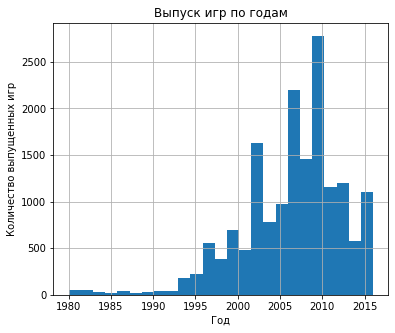

In [21]:
data.hist('year_of_release', bins = 25, figsize = (6,5))
plt.title ('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Очень хорошая визуализация. Уже по ней можно прикинуть актуальный период.    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>

Графики желательно подписывать: заголовок + подписи осей. </div>

<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

График подписала: заголовок + подписи осей. </div>

**Вывод 3.1**

* *Игры стали набирать популярность начиная с 2000 года*
* *Для исследования в дальнейшем можно взять период с 2013 по 2016 год, так как в 2013 году немного снизился выпуск игр, но в дальнейшем он начал расти*


In [22]:
pd.DataFrame(data.groupby('platform')['all_sales'].sum()).sort_values('all_sales', ascending = False)

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [23]:
pd.DataFrame(data.groupby(['platform','year_of_release'])['all_sales'].sum()).sort_values('all_sales', 
                                                                                          ascending = False).head(30)

all_sales
platform year_of_release           
Wii      2009                223.30
PS2      2004                211.81
         2002                205.38
         2003                184.31
         2005                182.87
X360     2010                180.21
PS       1998                172.77
Wii      2008                171.32
PS2      2001                166.43
PS3      2011                165.09
Wii      2007                152.77
DS       2008                148.65
         2007                146.94
PS       1999                144.53
X360     2011                143.84
PS3      2010                142.17
Wii      2006                137.15
PS       1997                136.17
X360     2008                135.26
PS3      2009                130.93
DS       2005                130.14
Wii      2010                127.95
X360     2009                120.29
DS       2006                119.81
         2009                119.54
PS4      2015                118.90
PS3      2008                118.52
         2013                113.25
         2012                107.36
PS2      2006                103.42

Text(0.5, 1.0, 'Sales/Year')

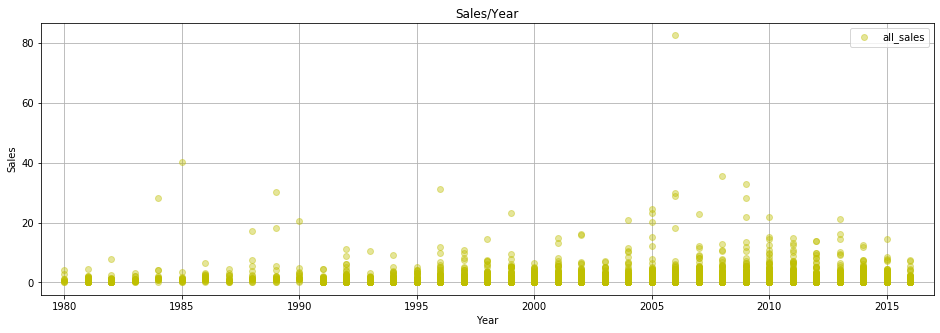

In [24]:
data.plot(x = 'year_of_release' , y = 'all_sales', style = 'yo', alpha = 0.4, figsize = (16,5), xlim = (1979, 2017),
          grid = True)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales/Year')

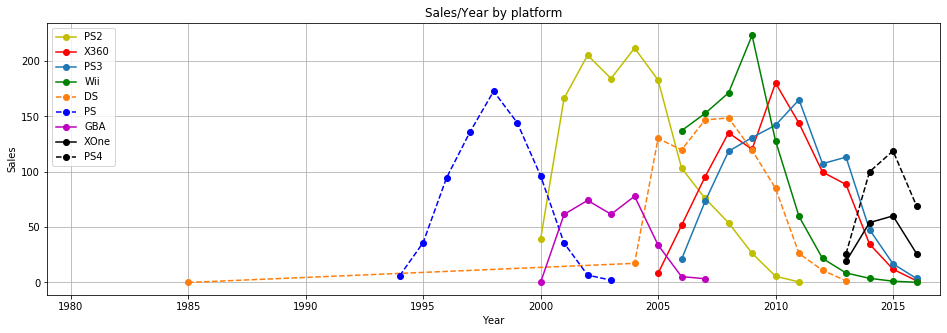

In [25]:
# как это оформить короче, например, с помощью subplot? 
fig, ax = plt.subplots(figsize = (16,5))
data.query('platform == ("PS2")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'yo-',
                                                                                    xlim = (1979, 2017),
                                                                                    ax = ax)
data.query('platform == ("X360")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'ro-',
                                                                                     xlim = (1979, 2017), 
                                                                                     ax = ax)
data.query('platform == ("PS3")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'o-', 
                                                                                    xlim = (1979, 2017), 
                                                                                    ax = ax)
data.query('platform == ("Wii")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'go-', 
                                                                                    xlim = (1979, 2017), 
                                                                                    ax = ax)
data.query('platform == ("DS")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'o--', 
                                                                                   xlim = (1979, 2017), 
                                                                                   ax = ax)
data.query('platform == ("PS")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'bo--',  
                                                                                   xlim = (1979, 2017), 
                                                                                   ax = ax)
data.query('platform == ("GBA")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'mo-',
                                                                                   xlim = (1979, 2017), 
                                                                                   ax = ax)
data.query('platform == ("XOne")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'ko-',
                                                                                   xlim = (1979, 2017), 
                                                                                   ax = ax)
data.query('platform == ("PS4")').groupby('year_of_release')['all_sales'].sum().plot(x = 'year_of_release', 
                                                                                   y = 'all_sales', 
                                                                                   style = 'ko--',
                                                                                   xlim = (1979, 2017), 
                                                                                   ax = ax)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales/Year by platform')
plt.grid(True)
ax.legend(["PS2","X360","PS3","Wii","DS", "PS","GBA",'XOne',"PS4"])

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
 
Оформить можно с помощью цикла или сводной таблицы. 
</div>

**Вывод 3.2**

* *Исходя из общих продаж, наибольшей популярностью обладали платформы PS2,X360,PS3,Wii и некоторые другие, по которым и был построен график* 
* *Исходя из графика стало понятно, что платформы популярны как правило 4-5 лет, жизненный цикл платформ составляет 8-9 лет*
* *График продаж по годам показал, что продажи игр постепенно увеличивались, а с 2000 активно начали расти*
* *Наиболее прибыльными были: приставка Wii в 2009 году, PS2 в 2002-2005 годах, X360 в 2010 году*	

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
  
    
- А по циклу жизни что можно сказать? Как я понимаю, 4-5 лет это период популярности.
    
    
- Если период с 2007 взят как актуальный, то это неверно. Решая эту задачу, я тоже сначала взяла лет 10. Но потом до меня дошло, что рынок динамичен, все меняется. Некогда популярный жанр за 10 лет может стать не таким популярным. И наоборот. Так что за это время несколько поколений сменятся :) А мы зацепим мертвые платформы и неактуальные предпочтения пользователей. Да и очевидно, что платформа, появившаяся в 2004 году и ставшая очень популярной, набрала больше продаж, чем новенькая консоль, у которой все еще впереди. Индустрия развивается, игры становятся лучше, графика лучше, а пользователи — более требовательными. В таких задачах нам нужна свежная информация, свежая оценка. Если прогнозируем на 2017 год, то какая разница, что было 10 лет назад? Потенциально прибыльные платформы мы можем легко отобрать по графикам и таблице прадаж. Но пользовательские портреты могут поменяться. Если взглянуть на столбчатую диаграмму продаж, то по ней можно понять, в какой год произошла стабилизация рынка после бурных продаж. 
    
   
</div>

<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

Добавила вывод по жизненному циклу

Период взяла с 2013 года по 2016 год теперь, изменила вывод 3.1 </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Отлично :) </div>

In [26]:
# данные изменены по году
data = data.query('year_of_release >= 2013')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


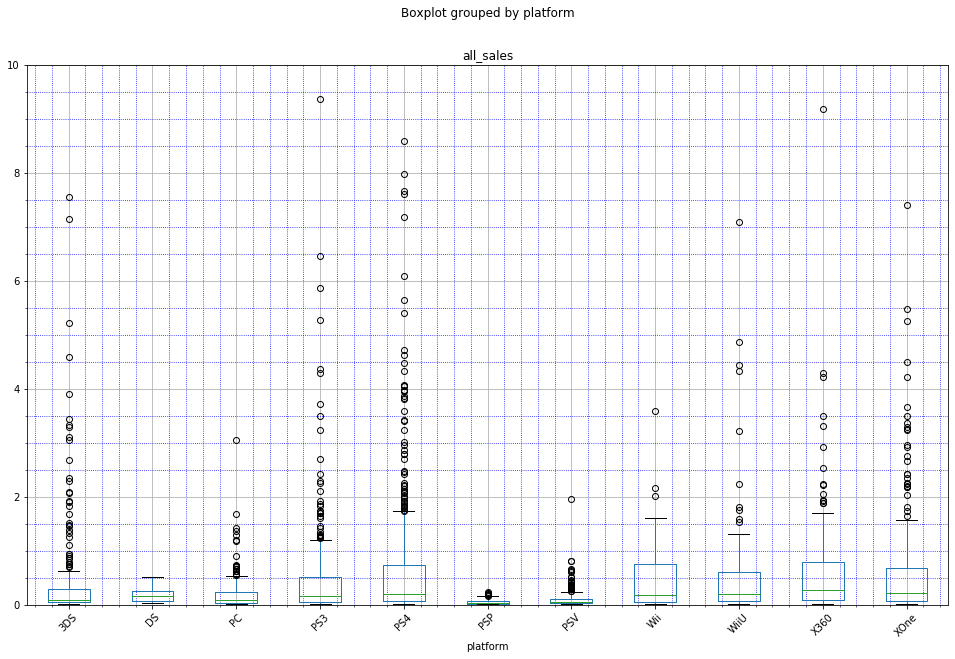

In [27]:
data.boxplot('all_sales', by = 'platform', figsize = (16,10), rot=45)
plt.ylim(0, 10)
plt.minorticks_on()
plt.grid(which='minor', 
        color = 'b', 
        linestyle = ':')

**Вывод по boxplot**: По диаграмме размаха видно, что наиболее успешными по продажам были игры на платформах X360,PS4,XOne,PS3,Wii большая часть значений лежит в области до 0,75 миллионов проданных копий; наблюдается большое число выбросов по PS3, PS4, 3DS

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Что можно сказать про выбросы? Не все клиенты умеют правильно интерпретировать подобные диаграммы.  Пожалуйста, добавь пару слов про этот боксплот и про выбросы.  
</div>

<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

Добавила вывод по boxplot</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Да, выбросов немало. Это какие-то популярные игры, судя по всему. Я бы даже сказала *бестселлеры*. И это очень показательная штука. Посмотри на 3DS. Маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве. 
</div>

In [28]:
# XOne и PS4 потенциально прибыльные платформы
data.query('year_of_release >= 2013').groupby(['platform','year_of_release'])['all_sales'].sum()

platform  year_of_release
3DS       2013                57.76
          2014                43.76
          2015                27.78
          2016                15.14
DS        2013                 1.54
PC        2013                12.38
          2014                13.28
          2015                 8.52
          2016                 5.25
PS3       2013               113.25
          2014                47.76
          2015                16.82
          2016                 3.60
PS4       2013                25.99
          2014               100.00
          2015               118.90
          2016                69.25
PSP       2013                 3.14
          2014                 0.24
          2015                 0.12
PSV       2013                10.59
          2014                12.16
          2015                 6.25
          2016                 4.25
Wii       2013                 8.59
          2014                 3.75
          2015                 1.14
  

**Вывод**: по всем платформам наблюдается снижение продаж в 2016 году по сравнению с предыдущими годами(2013-2015). Платформы PS4 и XOne имеют наибольшие продажи в 2016 году, что говорит о перспективности данных платформ

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
- Для чего этот срез по датам?


- В комментарии к коду ответ на вопрос задачи? :) Стоит для этого выделить Markdown ячейку. Не мешает и добавить пару слов о том, почему именно они выбраны. Ниже ты пишешь, что они выбраны 
>  исходя из графика 'Sales/Year by platform' и данных о продажах


но это мало о чем говорит.</div>

<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

Добавила вывод по срезу</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Супер! Я бы еще добавила 3DS. Продажи они пока держит.</div>

In [29]:
data1 = data.query('(platform == "PS4") ')
print('critic_score and sales:', data1['critic_score'].corr(data1['all_sales']))
print('user_score and sales:', data1['user_score'].corr(data1['all_sales']))

critic_score and sales: 0.40656790206178095
user_score and sales: -0.031957110204556424


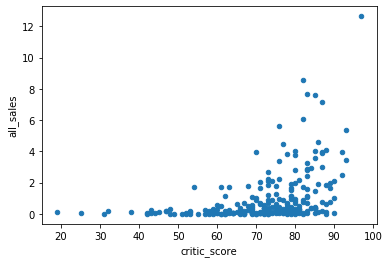

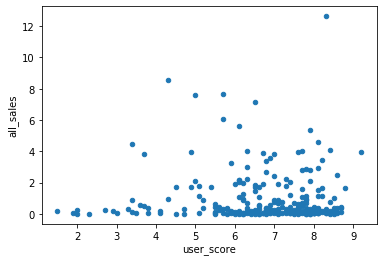

In [30]:
data1.plot(x = 'critic_score', y = 'all_sales', kind = 'scatter')
data1.plot(x = 'user_score', y = 'all_sales', kind = 'scatter')

In [31]:
data2 = data.query('platform == "XOne"')
print('critic_score and sales:', data2['critic_score'].corr(data2['all_sales']))
print('user_score and sales:', data2['user_score'].corr(data2['all_sales']))

critic_score and sales: 0.4169983280084017
user_score and sales: -0.06892505328279414


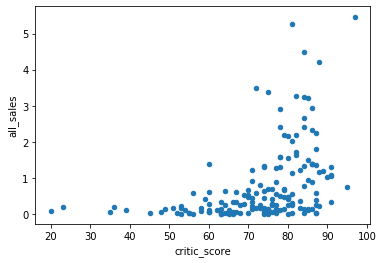

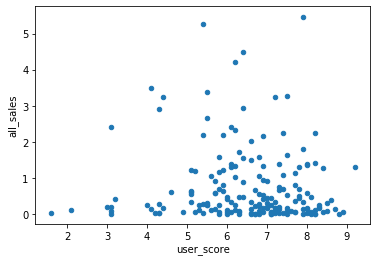

In [32]:
data2.plot(x = 'critic_score', y = 'all_sales', kind = 'scatter')
data2.plot(x = 'user_score', y = 'all_sales', kind = 'scatter')

In [33]:
pd.DataFrame(data.groupby('genre')['all_sales'].agg(['sum','count','median','mean']).sort_values(by = 'mean', ascending = False))

,sum,count,median,mean
genre,,,,
Shooter,233.05,188,0.445,1.239628
Sports,150.67,215,0.240,0.700791
Platform,42.63,74,0.225,0.576081
Role-Playing,146.18,294,0.125,0.497211
Racing,39.98,86,0.115,0.464884
Fighting,35.31,80,0.125,0.441375
Action,322.27,767,0.110,0.420169
Misc,62.82,155,0.100,0.405290
Simulation,22.25,64,0.105,0.347656


**Вывод 3.3**

* *По диаграмме размаха видно, что наиболее успешными по продажам были игры на платформах GBA,X360,PS2,XOne,PS3, большая часть значений лежит в области до 0,75-1 миллионов проданных копий*
* *XOne и PS4 потенциально прибыльные платформы, исходя из графика 'Sales/Year by platform' и данных о продажах*
* *Наблюдается прямая зависимость между отзывами критиков и продажами для платформ XOne и PS4, корреляция между пользовательскими отзывами и продажами отсутствует*
* *Наиболее прибыльными являются жанры шутер и спортивные игры, наименее прибыльными пазлы, приключения и стратегии*

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
А еще критиков меньше и они редко ставят низкие оценки. 
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Результаты желательно комментировать сразу, чтобы клиенту не пришлось мотать отчет туда-сюда.</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
> Наиболее прибыльными являются жанры экшн, шутер и спортивные игры


Выше выведены суммарные продажи. А если игр жанра экшн 3000, а игр жанра шутер всего 200? Тогда нельзя будет говорить, что экшн более успешен в продажах. 


О прибыли тут точно гвоорить нельзя, т.к. у нас объемы в проданных копиях, а не в деньгах. Да и себестоимость неизвестна. Но вот успешность продаж мы определить можем. Для этого достаточно сделать то же самое, но со средними или медианными продажами. </div>


<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

Добавлены столбики со средними и медианными значениями, исходя из которых были выбраны наиболее успешные/неуспешных жанры</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>
    
Получается, что экшн делает продажи только за счет большего количества игр и большого количества бестселлеров :)</div>

## Шаг 4. Портрет пользователя каждого региона

- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)


- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех». Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

In [34]:
pd.DataFrame((data.groupby('platform')['na_sales'].sum()*100/
              data['na_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,na_sales
platform,
PS4,24.79
XOne,21.23
X360,18.62
PS3,14.48
3DS,8.90


In [35]:
pd.DataFrame((data.groupby('platform')['eu_sales'].sum()*100/
              data['eu_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,eu_sales
platform,
PS4,35.95
PS3,17.28
XOne,13.14
X360,10.83
3DS,7.94


In [36]:
pd.DataFrame((data.groupby('platform')['jp_sales'].sum()*100/
              data['jp_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,jp_sales
platform,
3DS,48.16
PS3,16.57
PSV,13.24
PS4,11.33
WiiU,7.72


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
Похоже, что японцы больше любят портативные консоли и родной рынок.
</div>

In [37]:
pd.DataFrame((data.groupby('platform')['all_sales'].sum()*100/
              data['all_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,all_sales
platform,
PS4,28.76
PS3,16.61
XOne,14.59
3DS,13.23
X360,12.53


In [38]:
pd.DataFrame((data.groupby('genre')['na_sales'].sum()*100/
              data['na_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,na_sales
genre,
Action,28.78
Shooter,25.03
Sports,14.88
Role-Playing,10.60
Misc,6.27


In [39]:
pd.DataFrame((data.groupby('genre')['eu_sales'].sum()*100/
              data['eu_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,eu_sales
genre,
Action,30.15
Shooter,22.39
Sports,15.42
Role-Playing,9.43
Racing,5.14


In [40]:
pd.DataFrame((data.groupby('genre')['jp_sales'].sum()*100/
              data['jp_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,jp_sales
genre,
Role-Playing,36.30
Action,28.74
Misc,6.53
Fighting,5.43
Shooter,4.69


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера</b>
    
А вот популярный на Западе шутер они совсем не любят.</div>

In [41]:
pd.DataFrame((data.groupby('genre')['all_sales'].sum()*100/
              data['all_sales'].sum()).round(2).sort_values(ascending = False).head(5))

,all_sales
genre,
Action,29.51
Shooter,21.34
Sports,13.80
Role-Playing,13.38
Misc,5.75


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Здесь необходимо рассмотреть также и отсутствующий возрастной рейтинг, предварительно заменив его на маркерное значение. Эта задача является отличным примером того, что даже пропущенные значения могут нести в себе важную информацию. 
</div>

<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

Пустые значения рейтинга заменяем на 'Not given' </div>

In [42]:
data['rating'] = data['rating'].fillna('Not given')

In [43]:
pd.DataFrame((data.groupby('rating')['na_sales'].sum()*100/
              data['na_sales'].sum()).round(2).sort_values(ascending = False))

,na_sales
rating,
M,37.66
Not given,20.45
E,18.05
E10+,12.42
T,11.42


In [44]:
pd.DataFrame((data.groupby('rating')['eu_sales'].sum()*100/
              data['eu_sales'].sum()).round(2).sort_values(ascending = False))

,eu_sales
rating,
M,37.03
E,21.24
Not given,20.10
E10+,10.93
T,10.70


In [45]:
pd.DataFrame((data.groupby('rating')['jp_sales'].sum()*100/
              data['jp_sales'].sum()).round(2).sort_values(ascending = False))

,jp_sales
rating,
Not given,60.40
T,14.66
E,10.75
M,10.01
E10+,4.18


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>

Япония снова отличилась. Скорее всего, дело тут в том, что ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на западе и на востоке. Так или иначе, это очень показательный пример. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.

</div>

In [46]:
pd.DataFrame((data.groupby('rating')['all_sales'].sum()*100/
              data['all_sales'].sum()).round(2).sort_values(ascending = False))

,all_sales
rating,
M,34.03
Not given,25.38
E,18.34
T,11.63
E10+,10.61


**Вывод 4**
1. в Северной Америке предпочитают играть на PS4 в жанре экшн, шутер или спорт; самые продаваемые игры с рейтингом «M» («Mature») — «Для взрослых»
2. в Европе предпочитают играть на PS4 в жанре экшн, шутер или спорт; самые продаваемые игры с рейтингом "E" («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых»
3. в Японии предпочитают играть на 3DS в жанре ролевых игр, экшн; самые продаваемые игры с рейтингом «T» («Teen») — «Подросткам»
4. в мире в целом предпочитают играть на PS4 в жанре экшн, шутер; самые продаваемые игры с рейтингом «M» («Mature») — «Для взрослых»

## Шаг 5. Гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза о равенстве средних двух совокупностей: Н0 - средние равны, Н1 - средние не равны, критический уровень значимости 0.05


2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотеза о равенстве средних двух совокупностей: Н0 - средние равны, Н1 - средние не равны, критический уровень значимости 0.05

In [47]:
data['user_score'] = data['user_score'].fillna(100500)
xbox = data.loc[(data['platform'] == 'XOne')&(data['user_score']!=100500), ['user_score']]
pc = data.loc[(data['platform'] == 'PC')&(data['user_score']!=100500), ['user_score']]

alpha = 0.05
results = st.ttest_ind(xbox,pc)
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.14012658]
Не получилось отвергнуть нулевую гипотезу


*Полученное значение p-value выше критического уровня значимости, значит нулевая гипотеза не отвергается, средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

In [48]:
act = data.loc[(data['genre'] == 'Action')&(data['user_score']!=100500), ['user_score']]
sport = data.loc[(data['genre'] == 'Sports')&(data['user_score']!=100500), ['user_score']]

alpha = 0.05
results = st.ttest_ind(act,sport)
print('p-значение:', results.pvalue)

if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [9.64597811e-28]
Отвергаем нулевую гипотезу


*Полученное значение p-value значительно ниже критического уровня значимости, значит нулевая гипотеза отвергается, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные*

In [49]:
data.loc[data['user_score'] == 100500, 'user_score'] = np.nan
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Not given,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Not given,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not given,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Not given,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Not given,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Not given,0.01


## Шаг 6. Общий вывод

1. платформы популярны как правило 4-5 лет, жизненный цикл платформы 8-9 лет
2. XOne и PS4 потенциально прибыльные платформы, исходя из графика 'Sales/Year by platform' и данных о продажах
3. наиболее прибыльными являются жанры шутер и спортивные игры
4. важным является отзыв критиков, он влияет на продажи игр на XOne и PS4
5. для Америки стоит выпустить игру на PS4 в жанре экшн, шутер с рейтингом «M» («Mature») — «Для взрослых» 
6. для Европы стоит выпустить игру на PS4 в жанре экшн, шутер с рейтингом «M» («Mature») — «Для взрослых»
7. в Японии существует своя линейка платформ DS, можно выпусктить игру на 3DS в жанре ролевых игр с рейтингом «T» («Teen») — «Подросткам»

**По регионам**

- Америка : PS4, XOne; Action, Shooter; рейтинг М

- Европа: PS4, PS3;Action, Shooter; рейтинг М

- Япония: 3DS, PS3; Role-Playing, Action; рейтинг T



<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
Вывод хороший. Будет здорово, если добавишь конкретику по регионам:  2-3 консоли, 2-3 жанра и рейтинги. Также не забудь обновить вывод после внесения изменений. </div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера</b>
    
>не стоит ориентироваться на этот рынок

Такие советы заказчику лучше не давать. Нам дают данные по продажам в ЕС, СА и Японии не просто так. Если там совсем другой рынок, то надо об этом написать подробнее, но не говорить заказчику, что он зря возлагает надежды на тот или иной рынок. Да и почему не стоит ориентироваться, если портрет клиента у нас есть? Надо не избегать особенностей, а подстраиваться под них, если мы хотим получать прибыль. Это как отказаться от работы с некоторыми клиентами, потому что  у них необычные задачи или датасеты :)  </div>

<div class="alert alert-comment" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий студента</h2>

Изменила вывод </div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2</h2>

Теперь все отлично :)

</div>